<a href="https://colab.research.google.com/github/subalasingh/Deep_Neural_Networks/blob/main/Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN (Artificial Neural Network)

In [1]:
!pip install tensorflow

In [2]:
#importing tensorflow and checking it's version

import tensorflow as tf

print(tf.__version__)

2.18.0


In [3]:
##importing basic ibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#converting dataset in dependent and independent feature
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,-1]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
## Handling categorical features
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [10]:
## Concatanating these variables with the dataset
x = x.drop(['Geography','Gender'],axis=1)


In [11]:
pd.concat([x,geography,gender],axis =1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
#splitting the dataset into train-test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [14]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [15]:
x_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  0.66011376,
         0.97628121,  1.62185911],
       [-1.33847768,  0.07611425, -1.08432132, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [ 0.58347561,  0.26416674,  0.9869706 , ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  0.66011376,
        -1.02429504,  1.62356528]])

In [23]:
x_train.shape

(8000, 8)

In [17]:
#Creating ANN
#importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
###Lets initialize the ANN
classifier = Sequential()

In [24]:
##Adding the input layer
classifier.add(Dense(units= 8,activation = 'relu'))

In [25]:
#adding the efirst hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

In [26]:
#adding the second hidden layer
classifier.add(Dense(units= 6, activation = 'relu'))

In [27]:
#adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [28]:
#training the entire neural network
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy']) #adam optimizer has default learning rate = 0.01

In [29]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [32]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [33]:
model_history = classifier.fit(x_train,y_train,validation_split = 0.33, batch_size = 10,epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8630 - loss: 0.3427 - val_accuracy: 0.8451 - val_loss: 0.3702
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8544 - loss: 0.3448 - val_accuracy: 0.8493 - val_loss: 0.3674
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8612 - loss: 0.3375 - val_accuracy: 0.8485 - val_loss: 0.3669
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8662 - loss: 0.3253 - val_accuracy: 0.8493 - val_loss: 0.3656
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3376 - val_accuracy: 0.8485 - val_loss: 0.3702
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8574 - loss: 0.3418 - val_accuracy: 0.8501 - val_loss: 0.3647
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3424 - val_accuracy: 0.8516 - val_loss: 0.3655
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.3351 - 

In [35]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

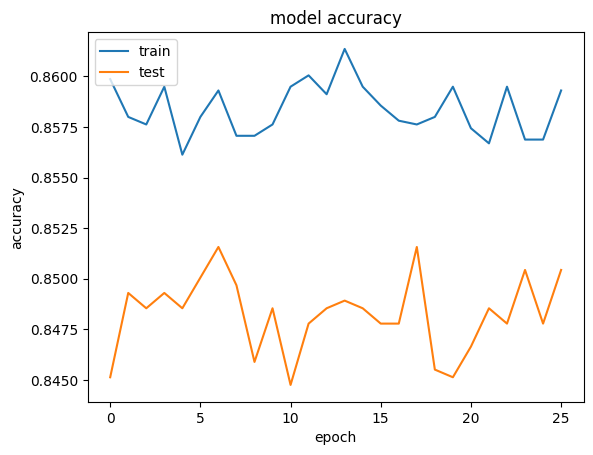

In [36]:
#summarizing history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

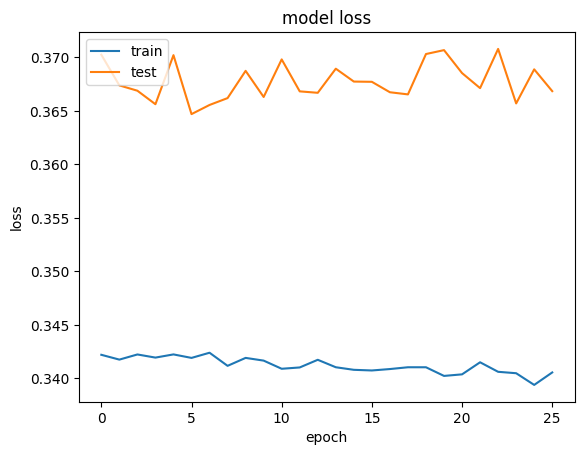

In [37]:
#summarizing history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [38]:
# predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
# Evaluating the model using Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1528,   67],
       [ 221,  184]])

In [40]:
##calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.856

In [41]:
## getting the weights
classifier.get_weights()

[array([[-0.06098164, -0.03364762,  0.02007486,  0.10803079,  0.02847316,
          0.06274234, -0.06925341,  0.09535912],
        [-0.12414014,  0.9958499 ,  0.35327074, -0.70058715,  0.40997404,
         -0.6820615 ,  0.51931345,  0.08686566],
        [ 0.81308997,  0.17855749, -0.05075173, -0.05163604, -0.07005483,
         -0.1982878 , -0.57841337,  0.04145131],
        [-0.7218395 , -0.18566488,  0.10164122, -0.37085953, -0.36689657,
         -0.22734976, -0.25526816, -0.35369733],
        [ 0.5062987 ,  0.282307  ,  0.992565  ,  0.01176656, -1.297014  ,
          0.32470688, -0.08893109, -0.12365217],
        [-0.64691156, -0.1739724 ,  0.00647272, -0.87488025,  0.07817784,
          1.1105037 , -0.7623412 ,  0.51157343],
        [-0.1638023 ,  0.5645322 , -0.23525217, -0.00902858, -0.15468545,
         -0.50562537,  0.28415918,  0.4117065 ],
        [-0.07119688, -0.032225  ,  0.06097007, -0.08968839,  0.10118035,
          0.2894663 ,  0.37121278, -0.0636756 ]], dtype=float32),